In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("AB_Test_data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'AB_Test_data.csv'

In [3]:
import os
os.listdir()


['.config', 'sample_data']

In [4]:
from google.colab import files
files.upload()


Saving AB_Test_data.csv to AB_Test_data.csv


{'AB_Test_data.csv': b'user_id,variation,converted\n4681,control,1\n9052,treatment,0\n9579,treatment,0\n2601,treatment,0\n7136,control,0\n1137,treatment,0\n4490,treatment,1\n926,treatment,0\n4476,treatment,1\n928,control,1\n5100,treatment,0\n8895,control,0\n8607,treatment,0\n4542,treatment,0\n7192,control,0\n6991,control,0\n3427,control,0\n1412,treatment,0\n804,control,0\n2703,control,0\n4975,treatment,0\n2862,control,0\n4881,control,0\n7643,treatment,0\n7524,treatment,0\n6189,control,0\n8878,treatment,0\n4371,control,1\n2377,control,0\n5224,control,0\n4122,treatment,0\n5060,control,0\n9881,treatment,0\n8469,control,0\n5180,treatment,1\n9057,treatment,0\n5768,control,0\n2155,treatment,1\n8584,treatment,0\n881,treatment,1\n6300,treatment,0\n5305,control,1\n3398,treatment,0\n9119,control,0\n8397,treatment,0\n3816,treatment,1\n5736,treatment,0\n9170,control,0\n7400,control,0\n4142,treatment,0\n1521,control,0\n6155,treatment,1\n4087,treatment,1\n8744,control,0\n7900,control,0\n1205,treatme

In [5]:
import os
os.listdir()


['.config', 'AB_Test_data.csv', 'sample_data']

In [6]:
import pandas as pd

df = pd.read_csv("AB_Test_data.csv")
df.head()


,user_id,variation,converted
0,4681,control,1
1,9052,treatment,0
2,9579,treatment,0
3,2601,treatment,0
4,7136,control,0


In [7]:
import numpy as np


In [8]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

control_rate, test_rate


NameError: name 'control' is not defined

In [9]:
df.columns


Index(['user_id', 'variation', 'converted'], dtype='object')

In [10]:
control = df[df['group'] == 'control']
test = df[df['group'] == 'test']


KeyError: 'group'

In [11]:
df['variation']

KeyError: 'group'

In [12]:
df.columns.tolist()


['user_id', 'variation', 'converted']

In [13]:
df['variation'].unique()


array(['control', 'treatment'], dtype=object)

In [14]:
control = df[df['variation'] == 'Control']
test = df[df['variation'] == 'Treatment']


In [15]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)


Control Conversion Rate: nan
Test Conversion Rate: nan


In [16]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['variation'], df['converted'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("P-value:", p_value)


P-value: 1.3673614431386136e-06


In [17]:
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis → Significant difference")
else:
    print("Fail to Reject Null Hypothesis → No significant difference")


Reject Null Hypothesis → Significant difference


In [18]:
alpha = 0.05

if p_value < alpha:
    decision = "Reject Null Hypothesis"
    significance = "Statistically Significant"
else:
    decision = "Fail to Reject Null Hypothesis"
    significance = "Not Statistically Significant"

decision, significance


('Reject Null Hypothesis', 'Statistically Significant')

In [19]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

diff = test_rate - control_rate

import numpy as np

se = np.sqrt(
    (control_rate * (1 - control_rate) / len(control)) +
    (test_rate * (1 - test_rate) / len(test))
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print("Conversion Rate Difference:", diff)
print("95% Confidence Interval:", (ci_low, ci_high))


ZeroDivisionError: float division by zero

In [20]:
len(control), len(test)


(0, 0)

In [21]:
df['variation'].value_counts()


,count
variation,
treatment,5024
control,4976


In [22]:
control = df[df['variation'] == 'control']
test = df[df['variation'] == 'treatment']

control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

diff = test_rate - control_rate

import numpy as np

se = np.sqrt(
    (control_rate * (1 - control_rate) / len(control)) +
    (test_rate * (1 - test_rate) / len(test))
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)
print("Difference (Test - Control):", diff)
print("95% Confidence Interval:", (ci_low, ci_high))


Control Conversion Rate: 0.2007636655948553
Test Conversion Rate: 0.24104299363057324
Difference (Test - Control): 0.04027932803571793
95% Confidence Interval: (np.float64(0.024038534022555128), np.float64(0.05652012204888074))


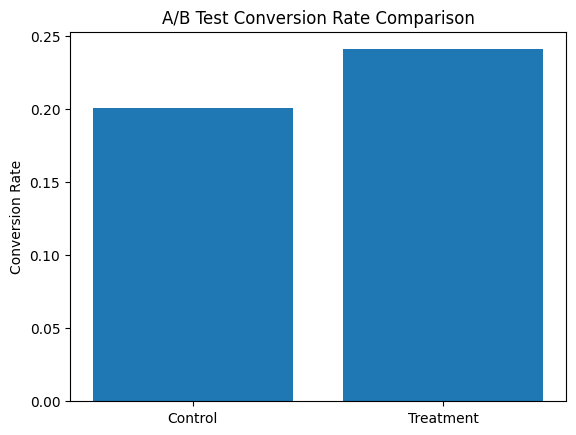

In [23]:
import matplotlib.pyplot as plt

labels = ['Control', 'Treatment']
rates = [control_rate, test_rate]

plt.bar(labels, rates)
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Rate Comparison")
plt.show()
